# Experiments with PDFA Specification Synthesis

Nicholas Renninger

## Preparing the Experiment

Loading in the PDFA specification model:

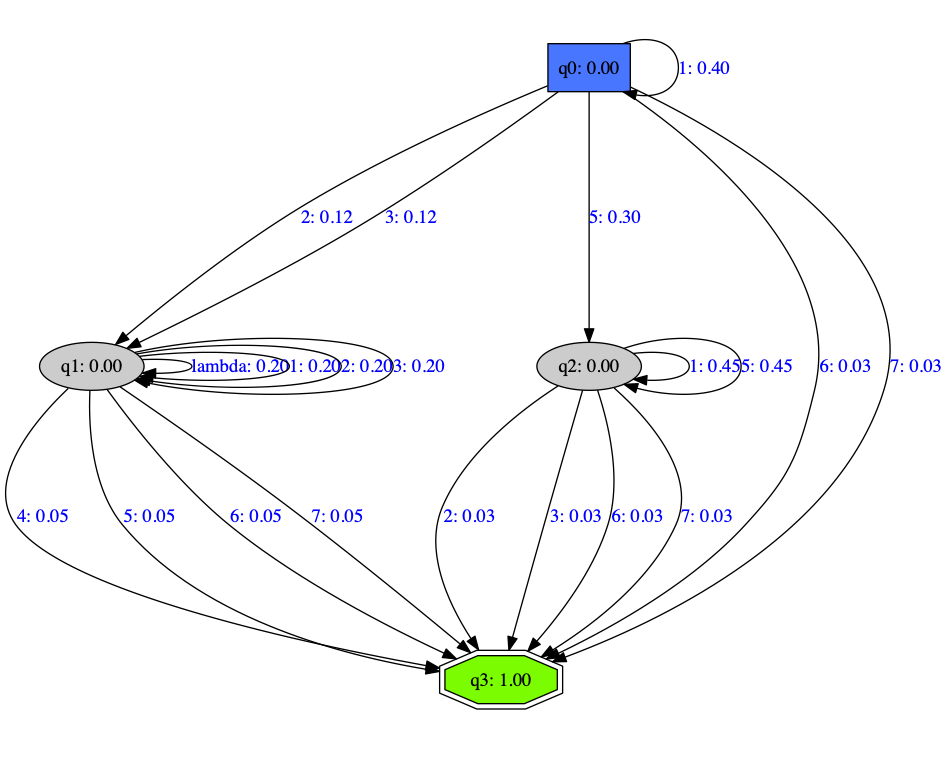

Trace: [1, 1, 5, 1, 5, 5, 5, 5, 1, 5, 5, 1, 5, 1, 5, 1, 1, 1, 3]
Probability of trace in language of the model: 7.53995845073178e-09
Approximate Cross-Entropy of Trace: 1.4201471726581074


In [1]:
%load_ext autoreload
%autoreload 2

from wombats.automaton import active_automata

pdfa_config_file = 'wombats/config/PDFA_meeting_example.yaml'
pdfa_specification = active_automata.get(automaton_type='PDFA',
                                         graph_data=pdfa_config_file)
pdfa_specification.draw('pdfa')
(trace, trace_len,
 trace_prob) = pdfa_specification.generate_trace(pdfa_specification.start_state, N=20)
trace_crossent = pdfa_specification.cross_entropy_approx(trace)

print('Trace:', trace)
print('Probability of trace in language of the model:', trace_prob)
print(f'Approximate Cross-Entropy of Trace: {trace_crossent}')

Loading in the Transition System (TS) model:

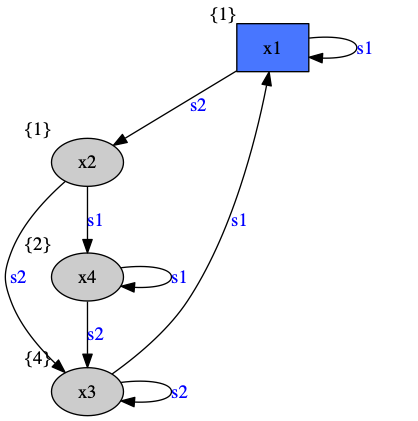

In [3]:
%autoreload 2
TS_config_file = 'wombats/config/TS_meeting_example.yaml'
transition_system = active_automata.get(automaton_type='TS',
                                        graph_data=TS_config_file)
transition_system.draw('TS')

In [4]:
word = ['s2', 's1', 's2']
print(transition_system.run(word))

([1, 1, 2, 4], ['x1', 'x2', 'x4', 'x3'])


In [5]:
print(transition_system.generate_trace(transition_system.start_state, N=10))

(['s2', 's1', 's2', 's2', 's2', 's1', 's2', 's1', 's2', 's1', 's2'], 11, 0.00048828125)


## PDFA ⊗ TS Product


/Users/nicholasrenninger/Google Drive/Grad School/specification learning/code/DPFA_DTS_product_experiment/dfasatInvestigations/wombats/automaton/base.py:758: RuntimeWarning: updating existing transition from state q0 under symbol 1
  warnings.warn(msg, RuntimeWarning)
/Users/nicholasrenninger/Google Drive/Grad School/specification learning/code/DPFA_DTS_product_experiment/dfasatInvestigations/wombats/automaton/base.py:758: RuntimeWarning: updating existing transition from state q0 under symbol 2
  warnings.warn(msg, RuntimeWarning)
/Users/nicholasrenninger/Google Drive/Grad School/specification learning/code/DPFA_DTS_product_experiment/dfasatInvestigations/wombats/automaton/base.py:758: RuntimeWarning: updating existing transition from state q0 under symbol 3
  warnings.warn(msg, RuntimeWarning)
/Users/nicholasrenninger/Google Drive/Grad School/specification learning/code/DPFA_DTS_product_experiment/dfasatInvestigations/wombats/automaton/base.py:758: RuntimeWarning: updating existing t

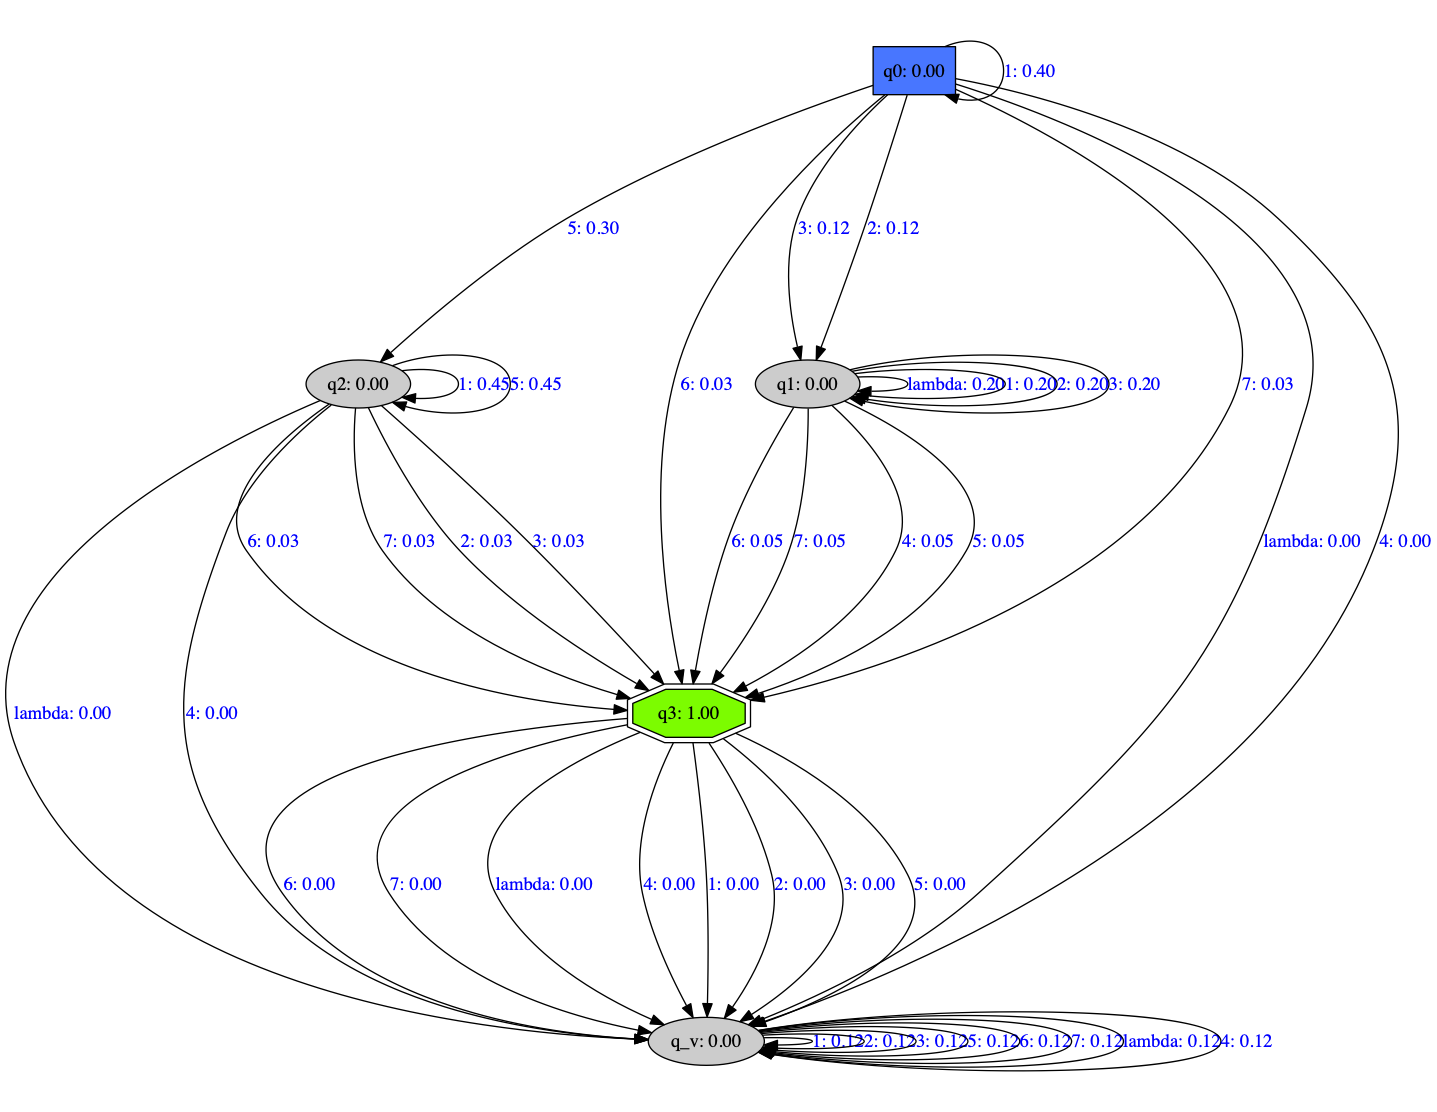

/Users/nicholasrenninger/Google Drive/Grad School/specification learning/code/DPFA_DTS_product_experiment/dfasatInvestigations/wombats/automaton/base.py:758: RuntimeWarning: updating existing transition from state x1 under symbol s1
  warnings.warn(msg, RuntimeWarning)
/Users/nicholasrenninger/Google Drive/Grad School/specification learning/code/DPFA_DTS_product_experiment/dfasatInvestigations/wombats/automaton/base.py:758: RuntimeWarning: updating existing transition from state x1 under symbol s2
  warnings.warn(msg, RuntimeWarning)
/Users/nicholasrenninger/Google Drive/Grad School/specification learning/code/DPFA_DTS_product_experiment/dfasatInvestigations/wombats/automaton/base.py:758: RuntimeWarning: updating existing transition from state x2 under symbol s2
  warnings.warn(msg, RuntimeWarning)
/Users/nicholasrenninger/Google Drive/Grad School/specification learning/code/DPFA_DTS_product_experiment/dfasatInvestigations/wombats/automaton/base.py:758: RuntimeWarning: updating existin

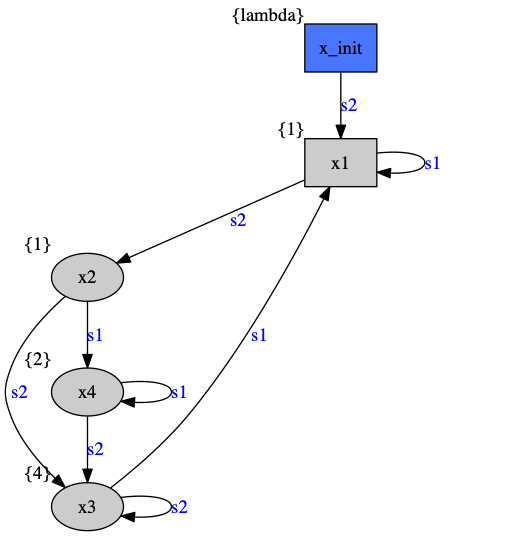

In [7]:
%autoreload 2
product = active_automata.get(automaton_type='Product',
                              graph_data=(transition_system,
                                          pdfa_specification),
                             show_steps=True)

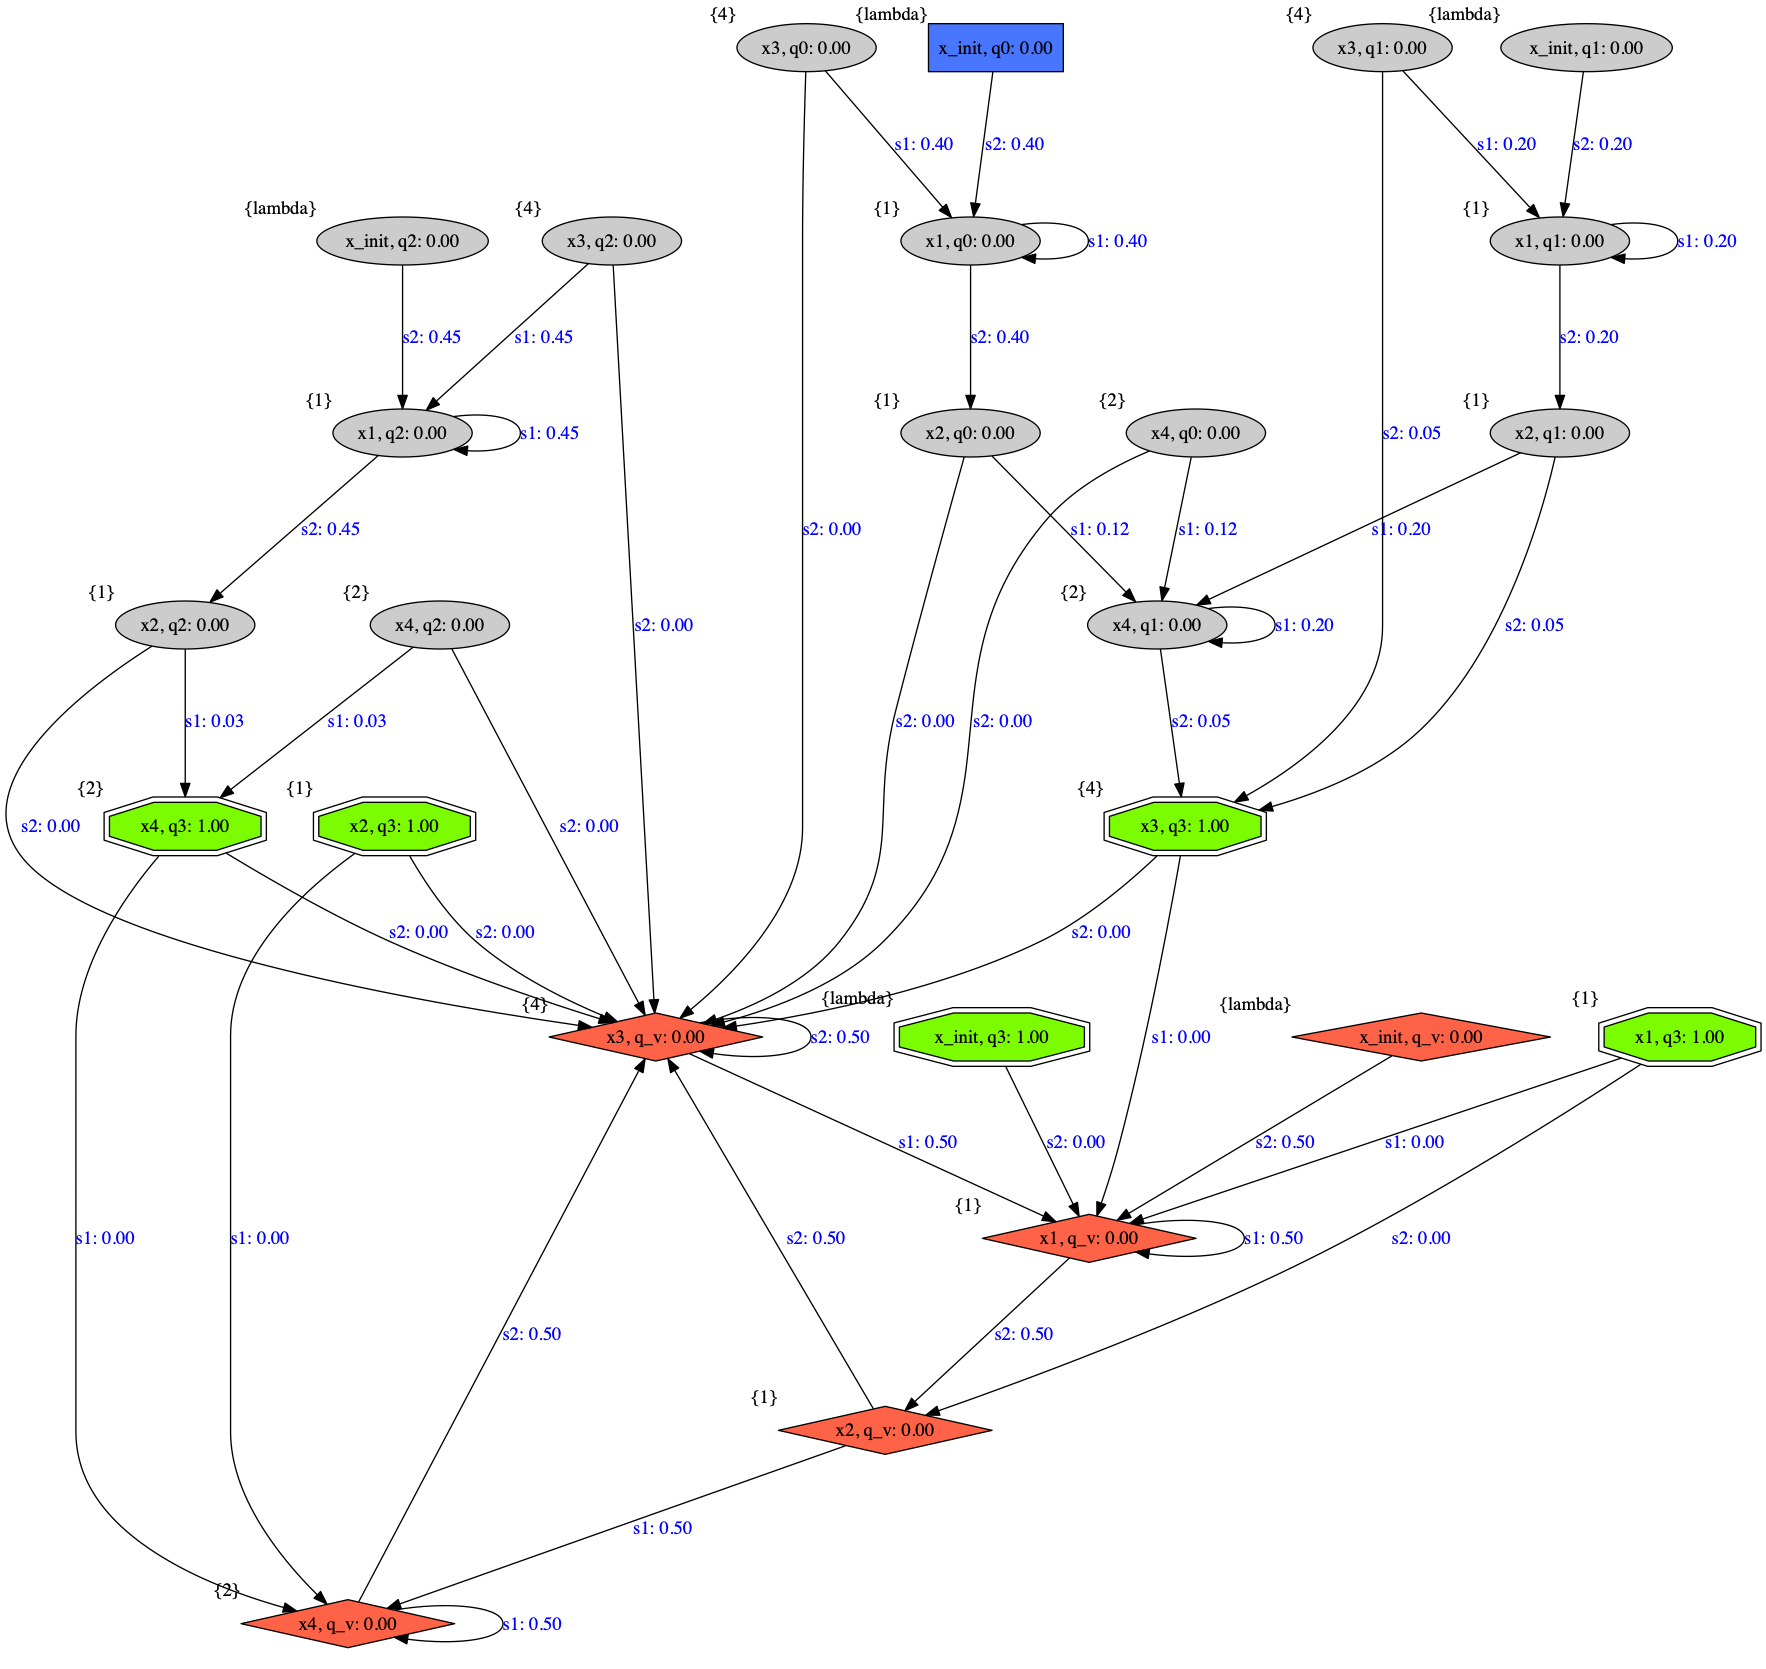

In [8]:
product.draw('product')

## Probabilistic Synthesis on the Product